## Upset heterogeneity plot

### Import libraries

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
mrmega=pd.read_csv("lead_snps_output.txt", sep="\t")
annot=pd.read_csv("lead_snps_annot.txt", sep="\t")
RE=pd.read_fwf("lead_snps_RE.txt")
betas=pd.read_csv("lead_snps_beta.txt", sep="\t")
rsids=pd.read_csv("lead_snps_rsIDs.txt", sep="\t",names=["MarkerName","rsID","Ref","Alt"])

In [5]:
mrmega.head()

,MarkerName,Chromosome,Position,EA,NEA,EAF,Nsample,Ncohort,Effects,beta_0,...,P-value_ancestry_het,chisq_residual_het,ndf_residual_het,P-value_residual_het,lnBF,Comments,P.value_association,P.value_ancestry_het,P.value_residual_het,Removed_studies
0,1:161155392,1,161155392,A,G,0.235452,606152,4,++-+,0.017726,...,0.250848,0.800087,2,0.670291,16.4211,NaN,1.846387e-08,0.250849,0.670291,Shigemizu
1,1:207750568,1,207750568,T,C,0.184541,614188,5,++++-,0.096541,...,0.475474,3.270410,2,0.194912,74.6021,NaN,3.555611e-33,0.475473,0.194912,None
2,2:127892810,2,127892810,T,C,0.385779,606152,4,++++,0.145145,...,0.312638,6.124690,2,0.046778,208.7050,NaN,5.736381e-92,0.312638,0.046778,Shigemizu
3,2:203716804,2,203716804,C,G,0.126079,606152,4,---+,-0.020443,...,0.245858,6.561100,2,0.037608,16.0055,NaN,2.798072e-08,0.245858,0.037608,Shigemizu
4,2:233981912,2,233981912,C,G,0.758149,606152,4,++-+,0.048488,...,0.079017,4.317540,2,0.115467,34.9680,NaN,1.627527e-16,0.079016,0.115467,Shigemizu


In [6]:
annot.head()

,uniqID,rsID,chr,pos,non_effect_allele,effect_allele,MAF,gwasP,r2,IndSigSNP,...,nearestGene,dist,func,CADD,RDB,minChrState,commonChrState,posMapFilt,eqtlMapFilt,ciMapFilt
0,1:161155392:A:G,1:161155392,1,161155392,G,A,0.18830,1.846387e-08,1.0,1:161155392,...,ADAMTS4,0,UTR3,7.452,3a,1,7,1,0,0
1,1:207750568:C:T,1:207750568,1,207750568,C,T,0.06569,3.555611e-33,1.0,1:207750568,...,CR1:RP11-78B10.2,0:0,ncRNA_intronic,0.330,6,4,15,1,0,0
2,2:127892810:C:T,2:127892810,2,127892810,C,T,0.39500,5.736381e-92,1.0,2:127892810,...,BIN1,27878,intergenic,11.310,5,5,15,0,0,0
3,2:203716804:C:G,2:203716804,2,203716804,G,C,0.04732,2.798072e-08,1.0,2:203716804,...,ICA1L,0,intronic,0.619,7,5,15,1,0,0
4,2:233981912:C:G,2:233981912,2,233981912,G,C,0.41990,1.627527e-16,1.0,2:233981912,...,INPP5D,0,intronic,2.380,5,4,15,1,0,0


In [7]:
RE.head()

,CHR,BP,SNP,A1,A2,N,P,P(R),BETA,BETA(R),Q,I,WEIGHTED_Z,P(WZ),F0,F1,F2,F3,F4
0,1,161155392,1:161155392,A,G,4,4.733000e-09,4.733000e-09,0.0526,0.0526,0.5481,0.00,5.771,7.901000e-09,0.0539,0.0848,0.0496,-0.0848,NaN
1,1,207750568,1:207750568,T,C,5,4.875000e-35,6.917000e-11,0.1206,0.1143,0.3135,15.86,NaN,NaN,0.1244,-0.0935,0.0937,0.0411,0.1832
2,2,127892810,2:127892810,T,C,4,3.714000e-93,1.180000e-08,0.1608,0.1342,0.0674,58.01,NaN,NaN,0.1686,0.0664,0.1084,0.1176,NaN
3,2,203716804,2:203716804,C,G,4,7.362000e-09,1.150000e-01,-0.0669,-0.0665,0.0480,62.06,-5.777,7.636000e-09,-0.0623,0.1992,-0.1417,-0.0593,NaN
4,2,233981912,2:233981912,C,G,4,7.177000e-17,5.346000e-02,0.0766,0.0511,0.0601,59.47,NaN,NaN,0.0852,0.0984,0.0302,-0.0293,NaN


In [8]:
betas.head()

,MARKERNAME,CHROMOSOME,POSITION,EA,NEA,EAF,OR,OR_95U,OR_95L,N,P,DATASET
0,1:161155392,1,161155392,A,G,0.2404,1.055379,1.075214,1.035910,457511,1.333000e-08,Bellenguez2022
1,1:207750568,1,207750568,T,C,0.1877,1.132469,1.155790,1.109618,457511,5.151000e-33,Bellenguez2022
2,2:127892810,2,127892810,T,C,0.3891,1.183647,1.203295,1.164319,457511,6.480000e-90,Bellenguez2022
3,2:203716804,2,203716804,C,G,0.1315,0.939601,0.962339,0.917400,457511,3.525000e-07,Bellenguez2022
4,2:233981912,2,233981912,C,G,0.7657,1.088935,1.110271,1.068009,457511,1.043000e-17,Bellenguez2022


In [9]:
rsids.head()

,MarkerName,rsID,Ref,Alt
0,1:161155392,rs4575098,G,A
1,1:207750568,rs679515,T,C
2,2:127892810,rs6733839,C,T
3,2:233981912,rs10933431,G,C
4,4:983809,rs4690221,C,T


In [10]:
# Make beta dataframe
RE["Ancestry"]="MULTI (RE)"
RE2=RE[["SNP", "BETA(R)","A1", "A2", "Ancestry"]].rename(columns={"SNP": "MarkerName",
                                                    "BETA(R)": "Beta", "A1": "EA", "A2": "NEA"})
betas["Beta"]=np.log10(betas["OR"])
betas["Ancestry"]=betas.replace({"DATASET": 
        {"Bellenguez2022" : "EUR", "FinngenR6": "EUR (FIN)", "Kunkle2021" : "AFR", "Shigemizu2021": "EAS", "CarHisp": "CAR HISP"}}).DATASET
betas=betas.rename(columns={"MARKERNAME": "MarkerName"})

betas2=betas[["MarkerName", "Beta", "EA", "NEA", "Ancestry"]]
all_betas=pd.concat([RE2, betas2], axis=0)

# Make sure the beta values are aligned to European minor allele
EUR_only=betas[betas["Ancestry"]=="EUR"].copy()
EUR_only["Minor_allele"]=np.where(EUR_only['EAF'] < 0.5, EUR_only['EA'], EUR_only['NEA'])
alts=EUR_only[["MarkerName", "Minor_allele"]]

# Manually change APOE SNPs EA to C since these are known risk alleles 
APOE_alts = pd.DataFrame({'MarkerName': ['19:45411941','19:45412079'], 'Minor_allele': ['C','C']})
alts = alts.append(APOE_alts, ignore_index = True)

all_betas2=all_betas.merge(alts, on="MarkerName")
all_betas2["Beta_fixed"]=np.where(all_betas2['EA']== all_betas2["Minor_allele"], all_betas2["Beta"], all_betas2["Beta"]*-1)
all_betas2.tail()

,MarkerName,Beta,EA,NEA,Ancestry,Minor_allele,Beta_fixed
243,21:27473875,0.054900,T,C,MULTI (RE),C,-0.054900
244,21:27473875,0.021715,T,C,EUR,C,-0.021715
245,21:27473875,0.041071,T,C,EUR (FIN),C,-0.041071
246,21:27473875,0.035048,T,C,AFR,C,-0.035048
247,21:27473875,0.018488,T,C,CAR HISP,C,-0.018488


In [11]:
mrmega["chisq_mrmega_tot"]=mrmega["chisq_ancestry_het"]+mrmega["chisq_residual_het"]

In [12]:
# Assign a locus name to each lead SNP
genes=annot[["rsID", "nearestGene"]].append({'rsID': "19:45411941", 'nearestGene': "APOE"}, ignore_index=True)
genes=genes.rename(columns={"rsID": "MarkerName"})
replace_genes={"CR1:RP11-78B10.2":"CR1",
 "SLC26A1:IDUA":"IDUA",
 "RP11-61G19.1":"CLNK/HS3ST1",
 "RP11-72L22.1":"COX7C",
 "TREML2":"TREM2",
 "RP3-399L15.3":"HS3ST5",
 "EPHA1-AS1":"EPHA1",
 "RP11-138I18.2":"ECHDC3",
 "RAPSN":"CELF1/SPI1",
 "MS4A6A":"MS4A gene cluster",
 "RNU6-560P":"PICALM",
 "IGHG1":"IGH gene cluster",
 "RP11-30K9.6":"ADAM10",
 "PRSS36":"KAT8",
 "RP11-960L18.1:PLCG2":"PLCG2",
 "RP11-333E1.1":"SCIMP/RABEP1",
 "RNU6-1307P":"LILRB2",
 "PMS2P1":"ZCWPW1/NYAP1", 
 "PRSS36":"KAT8",
 "WNT3":"MAPT", 
 "SNORA73":"SEC61G", 
 "SPATC1":"SHARPIN", 
 "FAM157C":"FAM157C/PRDM7"}

genes=genes.replace({"nearestGene": replace_genes})
genes2=rsids.merge(genes, on="MarkerName")
genes2=all_betas2[["MarkerName","Minor_allele"]].drop_duplicates().merge(genes2, on="MarkerName")
genes2["LocusName"]=genes2['nearestGene'] + ' (' + genes2['rsID'] + '-' + genes2['Minor_allele'] + ')'
genes2.head()

,MarkerName,Minor_allele,rsID,Ref,Alt,nearestGene,LocusName
0,1:161155392,A,rs4575098,G,A,ADAMTS4,ADAMTS4 (rs4575098-A)
1,1:207750568,T,rs679515,T,C,CR1,CR1 (rs679515-T)
2,2:127892810,T,rs6733839,C,T,BIN1,BIN1 (rs6733839-T)
3,2:203716804,C,rs150622102,G,C,ICA1L,ICA1L (rs150622102-C)
4,2:233981912,G,rs10933431,G,C,INPP5D,INPP5D (rs10933431-G)


In [15]:
het=mrmega[["MarkerName","chisq_ancestry_het","chisq_mrmega_tot"]].merge(RE[["SNP","I"]], left_on='MarkerName', right_on='SNP')
het_genes=het.merge(genes2, on="MarkerName")
het_genes2=het_genes.sort_values("I", ascending=False).rename(columns={"I": "Isq_RE"}).drop(columns=["SNP","rsID"])
norm=het_genes2["Isq_RE"]/het_genes2["chisq_mrmega_tot"]
het_genes2["chisq_ancestry_het_normRE"]=het_genes2["chisq_ancestry_het"]*norm
het_genes2["chisq_mrmega_tot_normRE"]=het_genes2["chisq_mrmega_tot"]*norm

# Assign an X position based on the center of each locus
het_genes2["X_center"]=[i + 0.5 for i in range(het_genes2.shape[0])]
het_genes2.head()

,MarkerName,chisq_ancestry_het,chisq_mrmega_tot,Isq_RE,Minor_allele,Ref,Alt,nearestGene,LocusName,chisq_ancestry_het_normRE,chisq_mrmega_tot_normRE,X_center
43,19:45411941,36.65280,86.829400,96.54,C,T,C,APOE,APOE (rs429358-C),40.751880,96.54,0.5
35,16:81773816,10.20910,20.607700,85.44,A,A,T,PLCG2,PLCG2 (rs4407053-A),42.327164,85.44,1.5
31,15:59057023,7.23144,12.328430,75.67,A,T,A,ADAM10,ADAM10 (rs602602-A),44.385462,75.67,2.5
14,7:28174986,13.78620,13.939845,71.32,C,T,C,JAZF1,JAZF1 (rs67250450-C),70.533911,71.32,3.5
12,6:114700597,9.10804,11.322000,65.32,G,A,G,HS3ST5,HS3ST5 (rs1997649-G),52.547003,65.32,4.5


In [16]:
# How many are heterogeneous
sig_het=het_genes2[het_genes2["Isq_RE"] >= 30]
# 19 of 48 have sig het
ancestral_het=sig_het[sig_het["chisq_ancestry_het_normRE"]/sig_het["chisq_mrmega_tot_normRE"] > .5]
# 11 of these are mostly ancestral het
sig_het.shape, ancestral_het.shape

((19, 12), (10, 12))

In [17]:
# How does APOE look
sig_het
40.751880/96.54

0.4221243008079552

In [18]:
sig_het_betas=all_betas2[(all_betas2["Ancestry"]!='MULTI (RE)')]
sig_het_betas=sig_het_betas[sig_het_betas['MarkerName'].isin(sig_het["MarkerName"])]                  
sig_het_betas["Abs_beta"]=np.abs(sig_het_betas["Beta_fixed"])
sig_het_betas=sig_het_betas.sort_values(["MarkerName", "Abs_beta"],ascending=False)

# strongest effect among all significant het
sig_het_effects=sig_het_betas.groupby("MarkerName").agg({'Beta_fixed': ['min', 'max'], 'Ancestry':['first', 'last']})

# strongest effect among all significant het that are at least 50% due to ancestry
ancestral_het_effects=sig_het_betas[sig_het_betas['MarkerName'].isin(ancestral_het["MarkerName"])].groupby("MarkerName").agg({'Beta_fixed': ['min', 'max'], 'Ancestry':['first', 'last']})

sig_het_effects.columns = ancestral_het_effects.columns= ["min_Beta", "max_Beta", "strongest_effect", "weakest_effect"]
sig_het_effects.groupby("strongest_effect").size()
ancestral_het_effects.groupby("strongest_effect").size()

strongest_effect
AFR         1
CAR HISP    4
EAS         4
EUR         1
dtype: int64

In [19]:
### Merge beta dataframe with X position
betas_final=all_betas2.merge(het_genes2, on="MarkerName")
betas_final=betas_final[["X_center","Ancestry","Beta_fixed"]]
betas_final["Ancestry_X"]=betas_final.replace({"Ancestry": 
        {"MULTI (RE)" : np.NaN, "EUR": 1, "EUR (FIN)" : 2, "AFR": 3, "CAR HISP": 4, "EAS": 5}}).Ancestry

betas_final.head()

# Choose bounds for colorbar
betas_final["Beta_fixed"].describe()

count    248.000000
mean       0.018083
std        0.107038
min       -0.209500
25%       -0.030277
50%        0.007255
75%        0.044260
max        1.026600
Name: Beta_fixed, dtype: float64

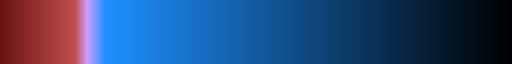

In [20]:
# Make custom palette with firebrick and dodgerblue
pal=["#6B1414","#C14E4E","#CF9FFF","#1E90FF", "#000000"]

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Want purple to be right at beta=0
quantiles=betas_final["Beta_fixed"].describe().loc[['min','25%','50%','75%','max']].tolist()
quantiles[2]=0
quantiles_norm=NormalizeData(quantiles)
cmp=LinearSegmentedColormap.from_list("", list(zip(quantiles_norm, pal)))
cmp

/var/folders/8q/cqh4b9kx3gzdr59hx3bhfzj52xky0j/T/ipykernel_25915/2428749596.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(betas_final["Ancestry"].unique(),fontsize=40)
/var/folders/8q/cqh4b9kx3gzdr59hx3bhfzj52xky0j/T/ipykernel_25915/2428749596.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


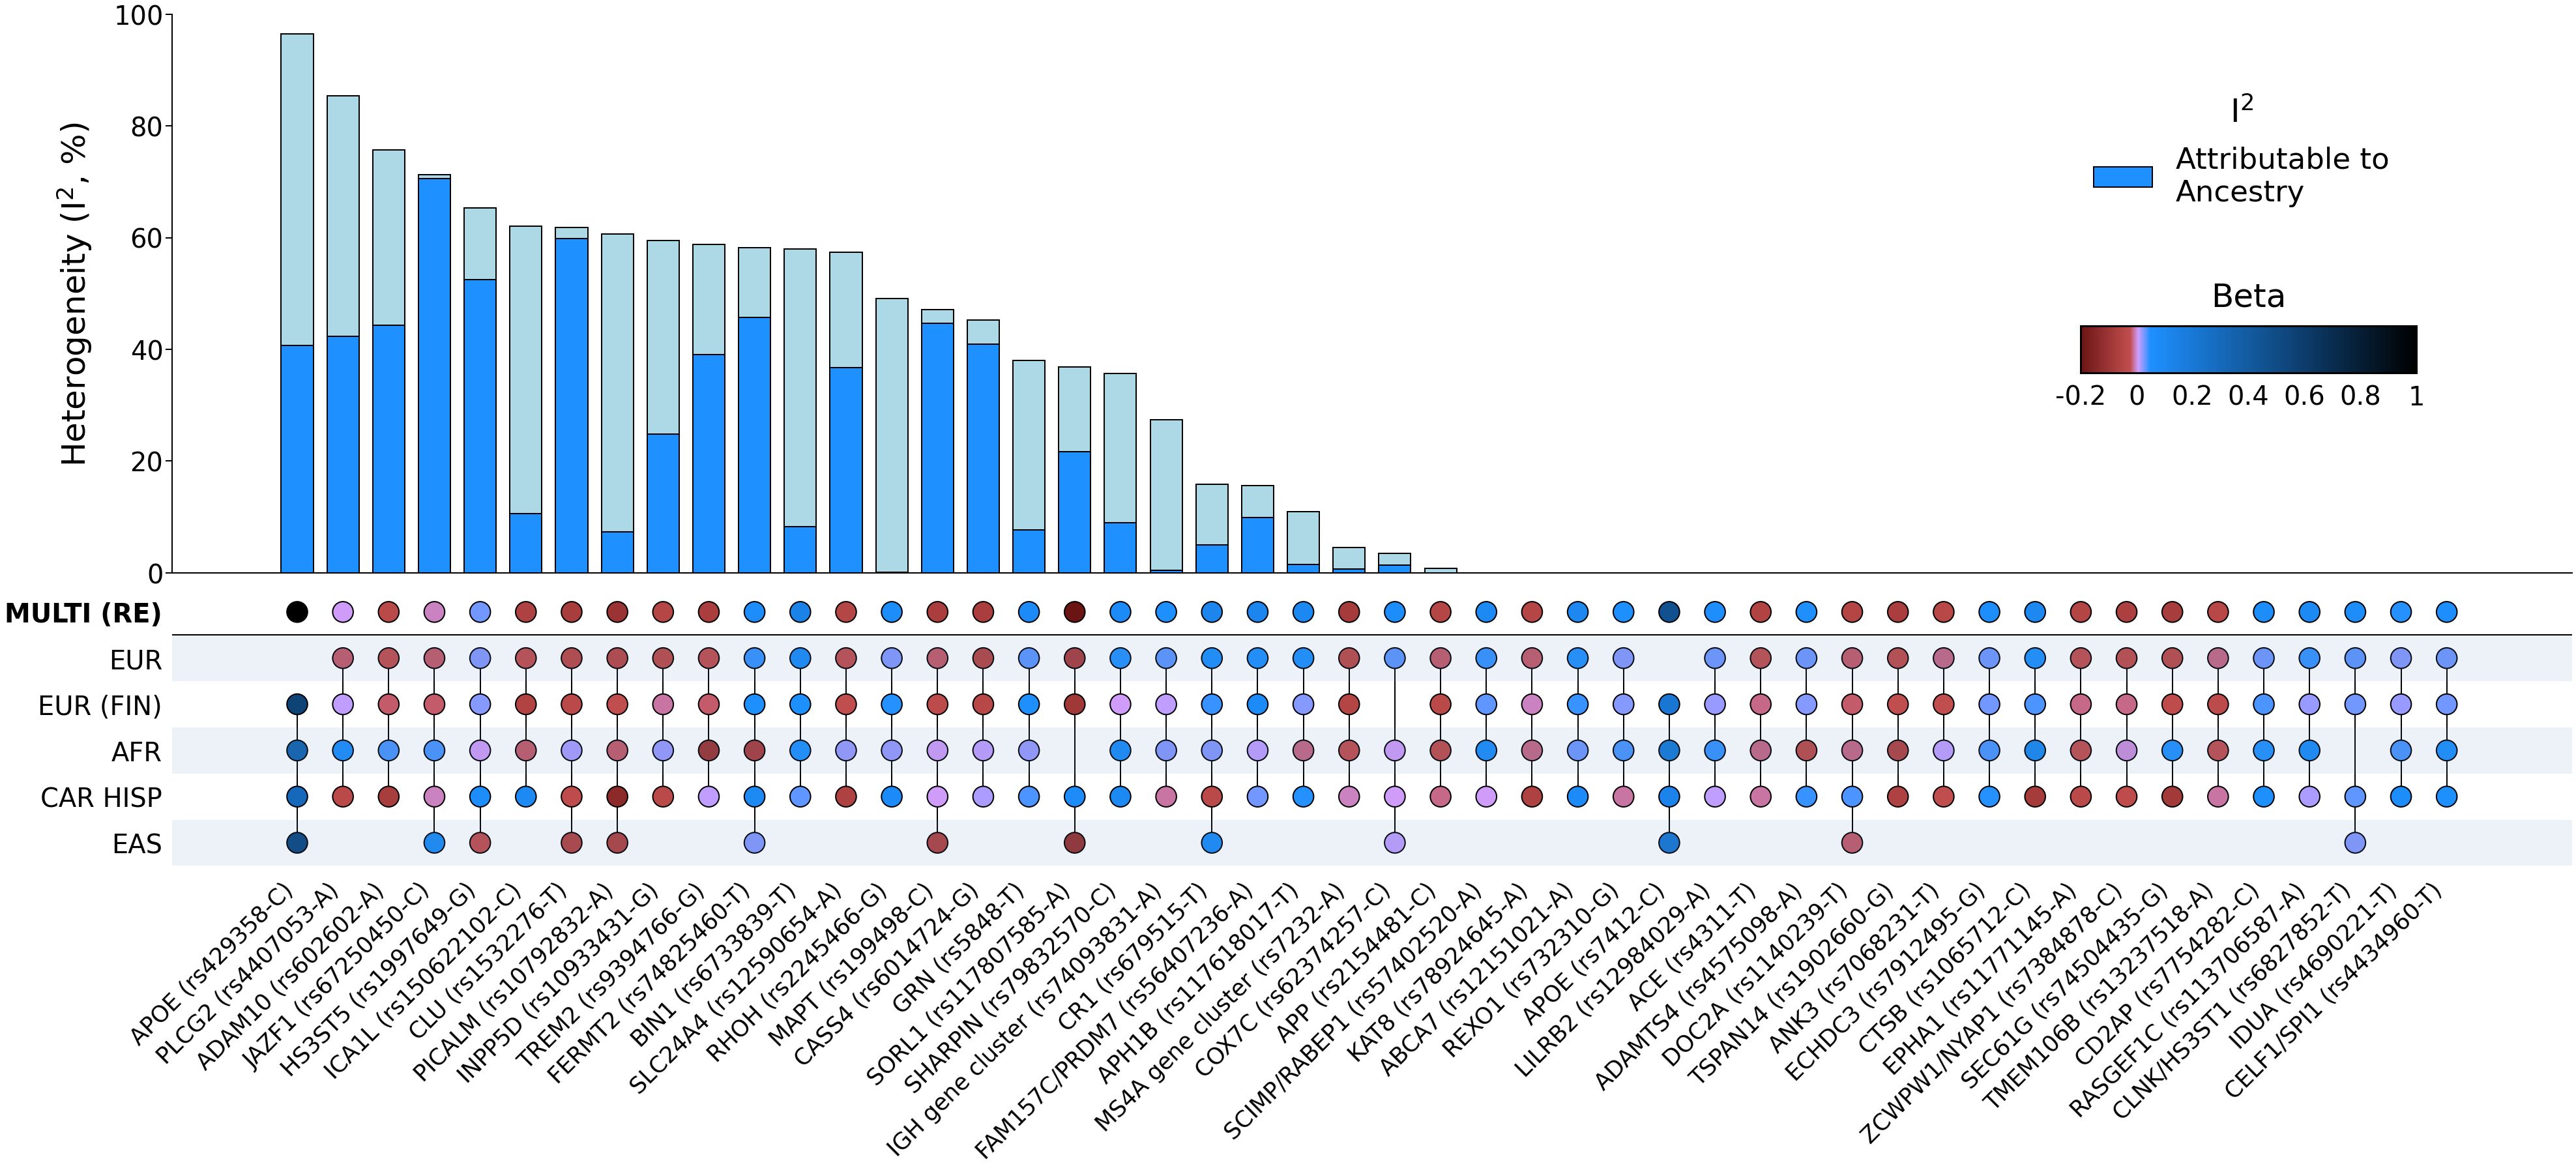

In [21]:
fig, ((ax2), (ax1)) = plt.subplots(nrows=2, ncols=1, figsize=(55, 25),sharex='all',
gridspec_kw={'height_ratios': [4, 2]})
sns.set_style({'font_scale': 2, 'axes.facecolor':'white', 'grid.color': '.8'})
fig.subplots_adjust(hspace=2)

x = betas_final["X_center"].sort_values().unique()
betas_final2=betas_final.groupby("X_center").agg({'Ancestry_X': ['min', 'max']})
y=[tuple(x) for x in betas_final2.to_numpy()]
ax1.plot((x,x),([i for (i,j) in y], [j for (i,j) in y]),c='black',zorder=0, linewidth=2)

# Combine multiple seaborn palettes to get better gradient
g=sns.scatterplot(data=betas_final,x="X_center", y="Ancestry", hue="Beta_fixed", ax=ax1, s=1000, linewidth=2,
                  edgecolor='black', palette=cmp, legend='brief')
ax1.get_legend().remove()
ax1.spines["top"].set_visible(False) 
ax1.spines["bottom"].set_visible(False) 
ax1.spines["left"].set_visible(False) 
ax1.spines["right"].set_visible(False) 

ax1.set_xticks(het_genes2["X_center"])
ax1.set_xticklabels(het_genes2["LocusName"], fontsize=35, rotation=45, ha='right')
ax1.set_yticklabels(betas_final["Ancestry"].unique(),fontsize=40)
ax1.tick_params(axis='y', which='both',length=0,pad=15)
ax1.tick_params(axis='x', which='both',length=0,pad=0)

ax1.get_yticklabels()[0].set_fontweight("bold")
ax1.set_ylabel('')
ax1.set_xlabel('')

## Add horizontal shading
ax1.axhspan(ymin=0.5, ymax=1.5, color='steelblue', alpha=0.1, lw=0)
ax1.axhspan(ymin=2.5, ymax=3.5, color='steelblue', alpha=0.1, lw=0)
ax1.axhspan(ymin=4.5, ymax=5.5, color='steelblue', alpha=0.1, lw=0)

# Ad horizontal line below MULTI
ax1.axhline(y=0.5, color='black', linestyle='-', lw=2)

ax3 = ax2.twinx()
bar1=ax3.bar(x = 'X_center', height = 'chisq_mrmega_tot_normRE', data = het_genes2, color = 'lightblue',width=0.7,linewidth=2,edgecolor='black')
bar2=ax3.bar(x = 'X_center', height = 'chisq_ancestry_het_normRE', data = het_genes2, color = 'dodgerblue',width=0.7,linewidth=2,edgecolor='black')

ax2.set_ylabel("Heterogeneity (I$^2$, %)", labelpad=30, fontsize=50)
ax2.set_ylim(0, 100)
ax3.set_ylim(0, 100)

# Round y-axis values
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax3.set_axis_off()
ax2.tick_params(axis='x', which='both',length=0)
ax2.tick_params(axis='y', which='both',length=10, labelsize=40, width=2)
ax2.spines["left"].set_linewidth(2)
ax2.spines["bottom"].set_linewidth(2)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

leg=ax2.legend(handles = [bar2],labels=['Attributable to\nAncestry'], labelspacing=0.6,
                bbox_to_anchor=(0.935,0.9),framealpha=0,fontsize=45,title_fontsize=50,edgecolor='black',title="I$^2$")

# Need to manually change colorbar to match scatter
sm = plt.cm.ScalarMappable(cmap=cmp)
sm.set_array([])
#position=fig.add_axes([0.795,0.75,0.12,0.03])
position=fig.add_axes([0.807,0.68,0.13,0.04])

cb_ticks=[-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
cb=plt.colorbar(sm, aspect=8, ax=ax2, cax=position, orientation="horizontal", ticks=NormalizeData(cb_ticks))
cb.ax.set_xticklabels(cb_ticks) 
cb.outline.set_color('black')
cb.outline.set_linewidth(3)
cb.ax.tick_params(labelsize=40, pad=15, width=0)
cb.ax.set_title('Beta',size=50, pad=30)

plt.tight_layout()

fig.savefig("Figure3.png",facecolor='white',dpi=300)
plt.show()